<h3>Cyfrowe przetwarzanie sygnałów i obrazów  -  Laboratorium 1 </h3>
Daria Jeżowska, 252731  <br>
Szymon Hutnik,  <br>


Import potrzebnych bibliotek

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from scipy import signal

<h3>Zadanie 1</h3>
Napisz skrypt w Pythonie/Matlabie umozliwiajacy wczytywanie i wizualizacje
badanych sygnałów. Program powinien umozliwiac obserwowanie wycinka
sygnału dla zadanego przedziału czasowego, skalowanie osi wykresów i ich opis oraz
zapis dowolnego wycinka sygnału do pliku o podanej nazwie.

1. ekg1.txt – 12 kolumn odpowiada odprowadzeniom, fs = 1000 Hz

Poniżej zostają wczytane z pliku 'ekg1.txt' do zmiennej ekg1. Następnie ustalana jest częstotliwość, czas trwania sygnału oraz stworzenie kolumny opisującej czas trwania sygnału dla danej próbki. Wyświetlone jest 5 pierwszych rekordów kolumny.




In [3]:
ekg1 = pd.read_csv('ekg1.txt', 
                  names = ['k1', 'k2', 'k3', 'k4', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10', 'k11', 'k12'], 
                  sep= ' ') 
fs_ekg1 = 1000 # częstotliwość sygnału [Hz]
t_ekg1 = (ekg1.shape[0] - 1) / fs_ekg1 # czas trwania sygnału, t = f/T [s] 
ekg1['t'] = ekg1.index/fs_ekg1
ekg1 = ekg1.set_index('t')
ekg1.head()

,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,k12
t,,,,,,,,,,,,
0.000,106,335,228,-227,-59,291,-392,-45,443,372,908,395
0.001,106,335,228,-227,-59,291,-392,-45,443,372,908,395
0.002,106,325,219,-219,-60,284,492,837,239,372,908,405
0.003,86,306,219,-214,-55,274,487,832,240,404,179,-63
0.004,96,320,224,-195,-65,264,492,842,244,404,174,-62


Do ekg100 zostały wczytane dane z pliku 'ekg100.txt', ustalona została częstotliwość i czas trwania sygnału oraz jak powyżej ustalony czas trwania dla każdej próbki i ustawiony jako indeks tabeli. Wyświetlone jest 5 pierwszych rekordów kolumny.



In [4]:
ekg100 = pd.read_csv('ekg100.txt', names = ['column'])
fs_ekg100 = 360 # częstotliwość sygnału [Hz]
t_ekg100 = (ekg100.shape[0] - 1) / fs_ekg100 # czas trwania sygnału, t = f/T [s] 
ekg100['t'] = ekg100.index/fs_ekg100
ekg100 = ekg100.set_index('t')
ekg100.head()

,column
t,
0.000000,-0.145
0.002778,-0.145
0.005556,-0.145
0.008333,-0.145
0.011111,-0.145


Wczytany został 'ekg_noise.txt' do ekg_noise, ustalona została częstotliwość sygnału oraz czas jego trwania. Wyświetlone jest 5 pierwszych rekordów kolumny.

In [5]:
ekg_noise = pd.read_csv('ekg_noise.txt', names = ['t', 'A'], sep = '\s+', index_col = 0)
fs_ekg_noise = 360 # częstotliwość sygnału, t = f/T
t_ekg_noise = (ekg_noise.shape[0] - 1) / fs_ekg_noise # czas trwania sygnału, t = f/T [s] 
ekg_noise.head()

,A
t,
0.000000,-0.325000
0.002778,-0.273038
0.005556,-0.268038
0.008333,-0.320000
0.011111,-0.391962


Poniższe wykresy przedstawiają wykresy, gdzie oś x to czas trwania sygnału, a oś y to wartość próbki w danej chwili. Wykresy zostały stworzone dzięki bibliotece matplotlib.pyplot.

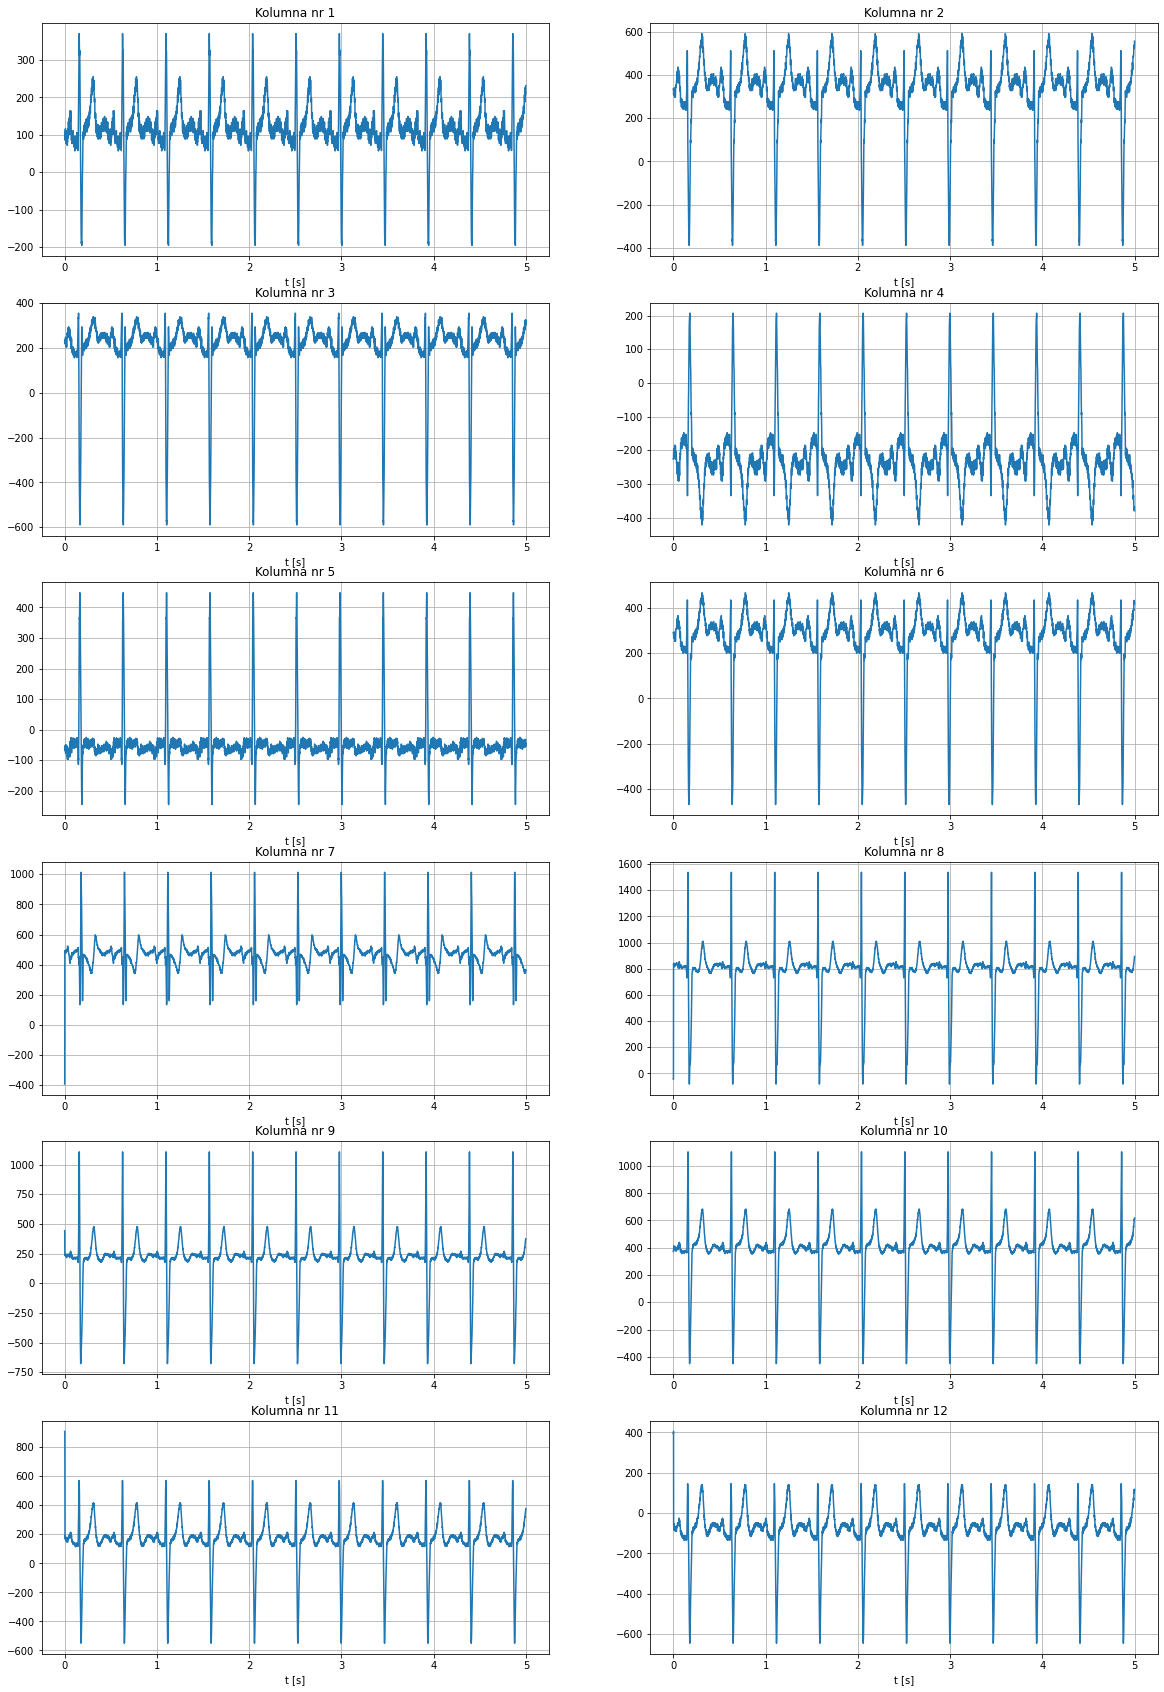

In [6]:
plt.figure(figsize=(20,30))
for i in range(1, 13):
    x = ekg1.index    # ustalenie osi x
    y = ekg1[f'k{i}'] # ustalenie osi y

    plt.subplot(6, 2, i)  # ustalenie miejsca na siatce wykresów danego wykresu

    plt.plot(x, y)        # stworzenie wykresu
    plt.grid(axis='both') # dodanie siatki 
    plt.xlabel('t [s]')   # dodanie opisu osi x
    plt.title(f'Kolumna nr {i}') # nazwanie wykresu

### Zadanie 2 ###
Celem cwiczenia jest praktyczne wypróbowanie funkcji numpy.fft i numpy.ifft do wyznaczania prostej i odwrotnej transformaty Fouriera [1, 3].


1. Wygeneruj ciag próbek odpowiadajacy fali sinusoidalnej o czestotliwosci 50 Hz
i długosci 65536.


Ustawienie danych:

In [7]:
length = 65536  # długość fali
f = 50          # częstotliwość
fs = 480000     # częstotliwość próbkowania

Wygenerowanie sinusa o zadanej długości i częstotliwości oraz stworzenie wykresu:

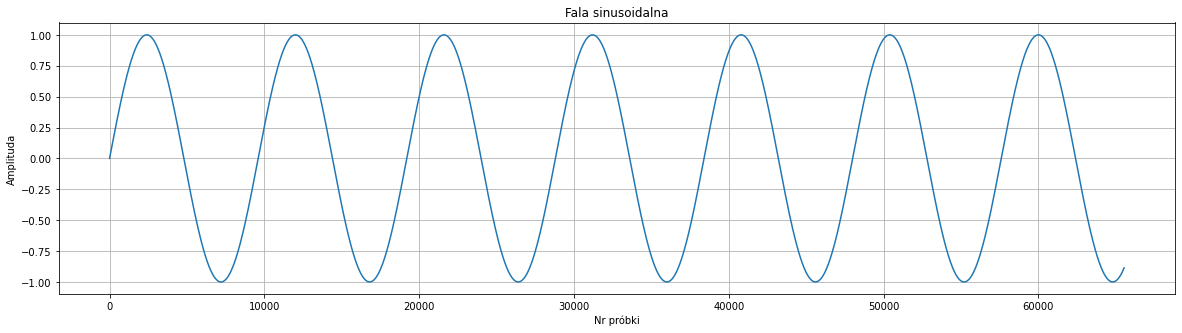

In [8]:

x = np.arange(length)                 # równomierne rozłożenie próbek dla długości 65536
y = np.sin(2 * np.pi * x * f / fs)    # obliczenie wartości sinuda dla danej próbki x, pulsacja n-tej próbki będzie równa n * delta fi, delta fi = 2 pi f / fs

plt.figure(figsize=(20,5))    
plt.plot(x, y)                 # stworzenie wykresu z wartości x i y
plt.xlabel('Nr próbki')        # nadanie nazwy osi x 
plt.ylabel('Amplituda')        # nadanie nazwy osi y
plt.title('Fala sinusoidalna') # nadanie tytułu wykresowi
plt.grid(True, which='both')   # włączenie siatki

x = plt.show()

2. Wyznacz dyskretna transformate Fouriera tego sygnału i przedstaw jego widmo
amplitudowe na wykresie w zakresie czestotliwosci [0, fs/2], gdzie fs oznacza
czestotliwosc próbkowania.


Funkcja np.fft.rfft to dyskretna transformata Fouriera dla n-punktów w zakresie częstotliwości dla rzeczywistego sygnału. Oznacza to, że zobaczymy tylko jeden prążek, bez jego zespolonego sprzężenia. Ponadto skalujemy widmo dzieląc je przez połowę długości (length/2), aby wartości widmowe reprezentowały energię poszczególnych składowych.

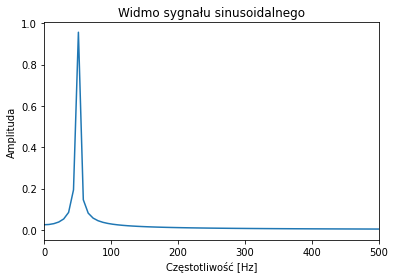

In [9]:
sin = y # dla dalszej czytelności kodu zmieniamy x na sin

spectrum = np.abs(np.fft.rfft(sin)) / (length / 2) 
                                                  
fs = 480000
T = 1/fs
f = np.fft.rfftfreq(length, T) # częstotliwość dyskretnej transformaty fouriera

plt.plot(figsize=(20, 5))         
plt.plot(f, spectrum)
plt.xlim(0, 500)
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')
plt.title('Widmo sygnału sinusoidalnego')

plt.show()

3. Wygeneruj ciag próbek mieszaniny dwóch fal sinusoidalnych (tzn. ich kombinacji
liniowej) o czestotliwosciach 50 i 60 Hz. Wykonaj zadanie z punktu 2 dla tego
sygnału.


Funkcja generuje najpierw dwa sinusy o zadanych częstotliwościach 50Hz (y1) oraz 60Hz (y2), a następnie je sumuje. Następnie obliczana jest tranformata Fouriera dla y i stworzony wykres.

In [10]:
def spectrum_two_sinuses(f1, f2, fs):
    length = 65536                            # długość sygnału
    x = np.arange(length)                     # równomierne rozłożenie próbek dla długości 65536
    y1 = np.sin(2 * np.pi * x * f1 / fs )     # obliczenie wartości dla każdej próbki 
    y2 = np.sin(2 * np.pi * x * f2 / fs )
    y = y1 + y2                               # zsumowanie dwóch sygałów
    spectrum2 = np.fft.rfft(y)                # obliczenie transformaty dla dwóch fal 

    plt.figure(figsize = (25, 5))

    plt.subplot(1, 2, 1)
    plt.plot(x, y)
    plt.title('Kombinacja liniowa fal sinusoidalnych')
    plt.xlabel('Częstotliwść [Hz]')
    plt.ylabel('Amplituda')

    plt.subplot(1, 2, 2)
    plt.plot(f, np.abs(spectrum2) / (length/2))
    plt.xlim(0, 2000)
    plt.title('Widmo fal sinusiodalnych')
    plt.xlabel('Częstotliwość [Hz]')
    plt.ylabel('Wartość')

    plt.show()


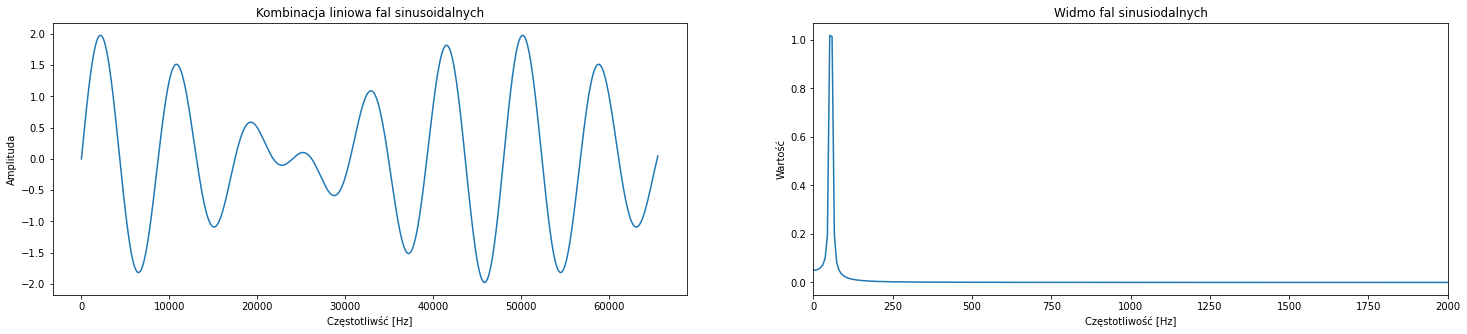

In [11]:
spectrum_two_sinuses(50, 60, 480000)

4. Powtórz eksperymenty dla róznych czasów trwania sygnałów, tzn. dla róznych
czestotliwosci próbkowania.


Wywołanie funkcji spectrum_two_sinuses dla różnych częstotliwości próbkowania.

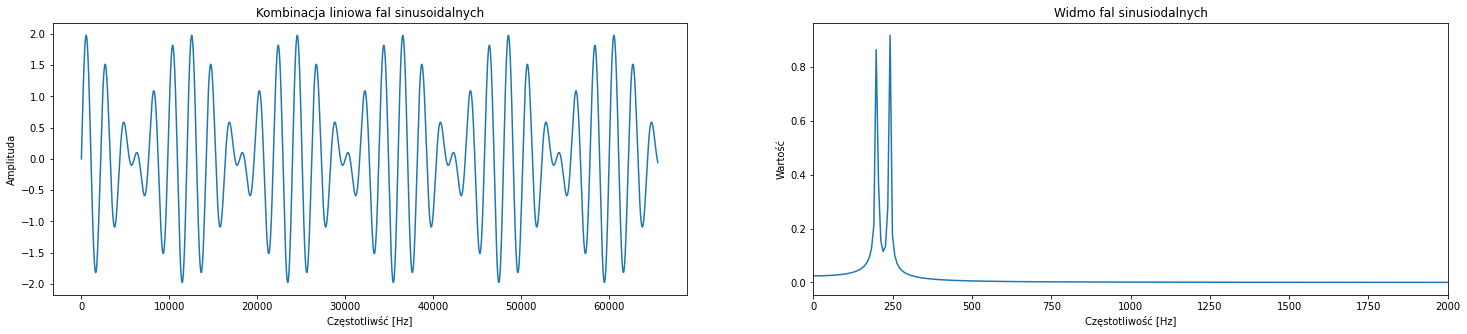

In [12]:
spectrum_two_sinuses(50, 60, 120000) 

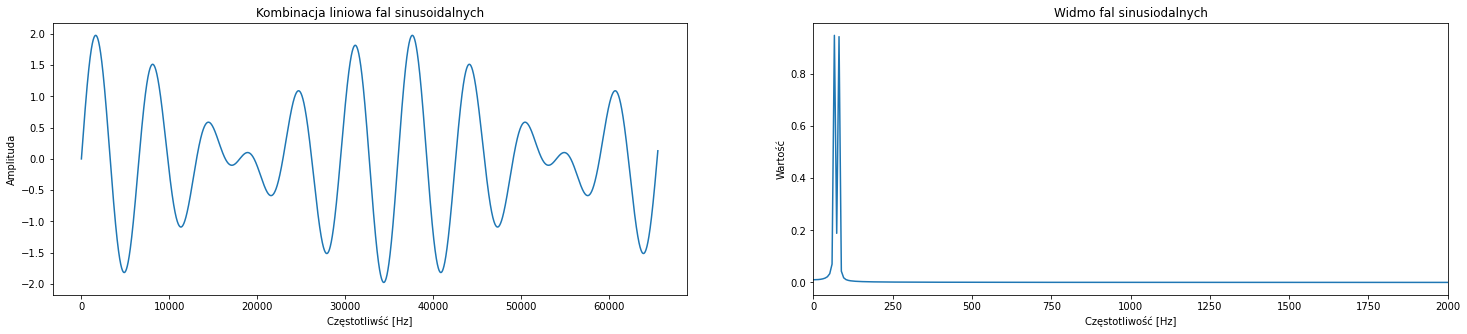

In [13]:
spectrum_two_sinuses(50,60, 360000)

5. Wyznacz odwrotne transformaty Fouriera ciagów wyznaczonych w zadaniu 2
i porównaj z ciagami oryginalnymi.

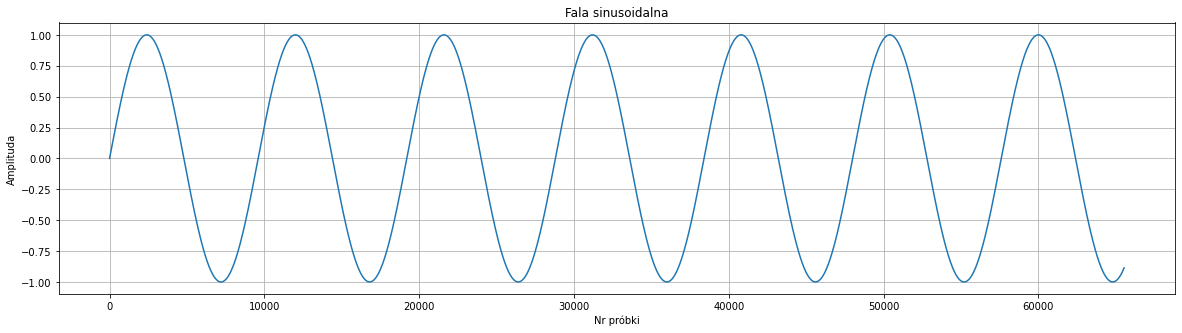

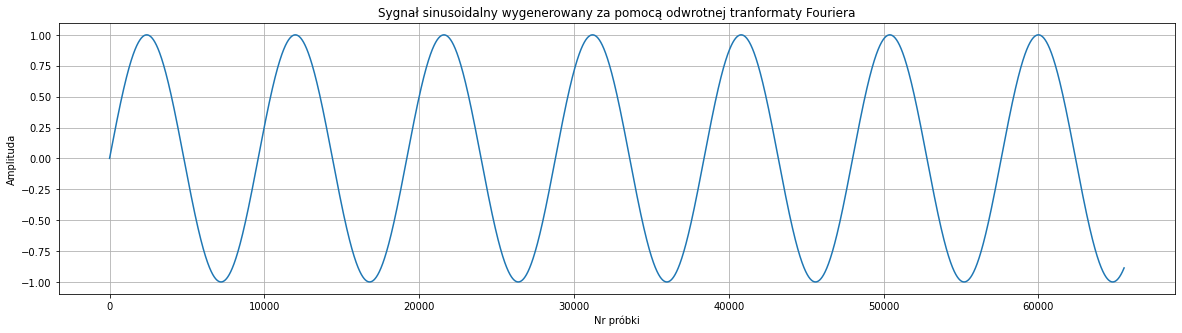

In [14]:
length = 65536  # długość fali
f = 50          # częstotliwość
fs = 480000     # częstotliwość próbkowania

x = np.arange(length)                 # równomierne rozłożenie próbek dla długości 65536
y = np.sin(2 * np.pi * x * f / fs)    # obliczenie wartości sinuda dla danej próbki x, pulsacja n-tej próbki będzie równa n * delta fi, delta fi = 2 pi f / fs

plt.figure(figsize=(20,5))    
plt.plot(x, y)                 # stworzenie wykresu z wartości x i y
plt.xlabel('Nr próbki')        # nadanie nazwy osi x 
plt.ylabel('Amplituda')        # nadanie nazwy osi y
plt.title('Fala sinusoidalna') # nadanie tytułu wykresowi
plt.grid(True, which='both')   # włączenie siatki

x = plt.show()



y_spectrum = np.fft.rfft(sin)            # wygenerowanie widma fali sinusoidalnej
plot = np.real(np.fft.irfft(y_spectrum)) # funkcja np.fft.irfft oblicza odwrotną transformatę fouriera dla sygnału rzeczywistego

plt.figure(figsize=(20, 5))
plt.plot(plot)
plt.title('Sygnał sinusoidalny wygenerowany za pomocą odwrotnej tranformaty Fouriera')
plt.xlabel('Nr próbki')
plt.ylabel('Amplituda')
plt.grid(True, which='both')

plt.show()


### Zadanie 3 ###
Celem cwiczenia jest obserwacja widma sygnału EKG.

1. Wczytac sygnał ekg100.txt i ocenic go wizualnie na wykresie

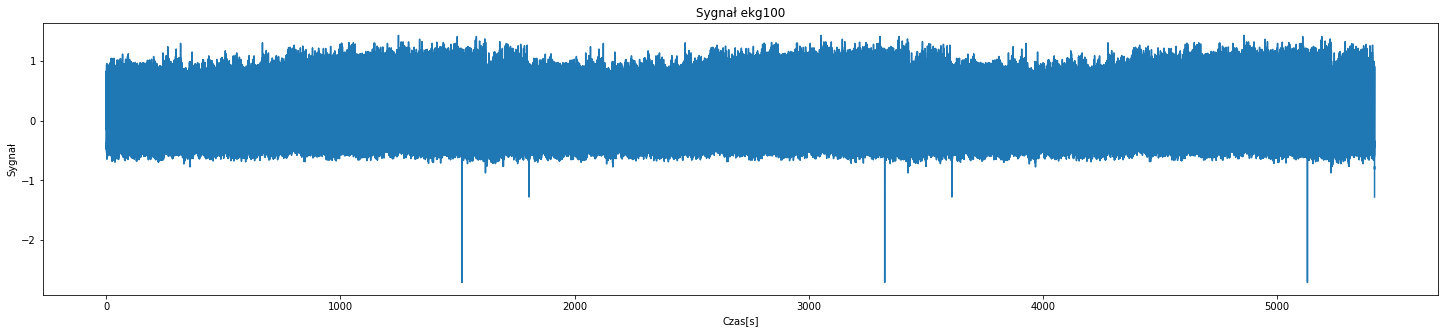

In [15]:
ekg100 = pd.read_csv('ekg100.txt', names = ['1'])
fs_ekg100 = 360
n = 3600
ekg100_10s = ekg100.head(n) # wybranie próbek odpowiadającym 10s

t_ekg100 = (ekg100.shape[0] - 1) /fs_ekg100 # czas trwania sygnału
ekg100['czas'] = ekg100.index/fs_ekg100     # obliczenie czasu wystąpienia każdej próbki
ekg100 = ekg100.set_index('czas')

plt.figure(figsize=(25, 5))
plt.plot(ekg100.index, ekg100['1'])
plt.title('Sygnał ekg100')
plt.xlabel('Czas[s]')
plt.ylabel('Sygnał')
plt.show()


Aby wykres był czytelniejszy stworzyliśmy kolejny wykres sygnału dla pierwszych 10 sekund.

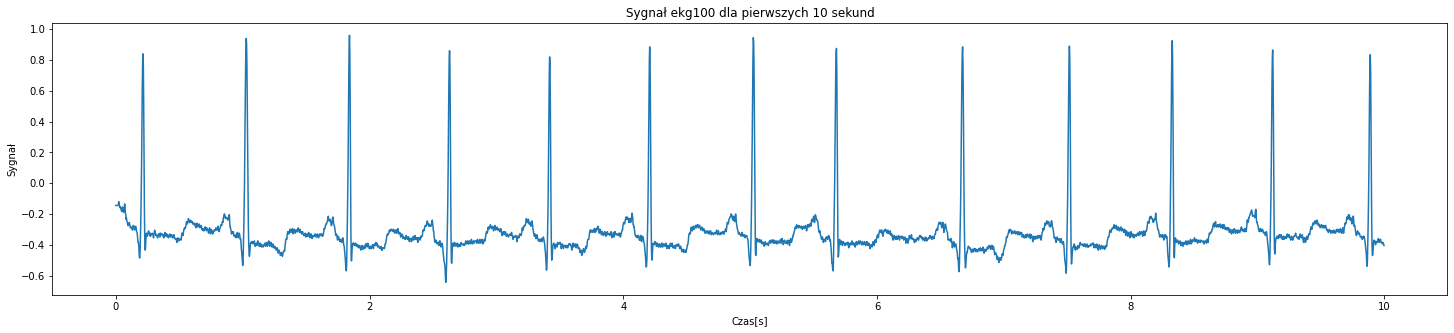

In [16]:
ekg100_10s['czas'] = ekg100_10s.index / fs_ekg100
ekg100_10s = ekg100_10s.set_index('czas')

plt.figure(figsize=(25, 5))
plt.plot(ekg100_10s.index, ekg100_10s['1'])
plt.title('Sygnał ekg100 dla pierwszych 10 sekund')
plt.xlabel('Czas[s]')
plt.ylabel('Sygnał')
plt.show()

2. Wyznaczyc jego dyskretna transformate Fouriera i przedstawic widmo amplitudowe
sygnału w funkcji czestotliwosci w zakresie [0, fs/2], gdzie fs oznacza
czestotliwosc próbkowania.

Text(0, 0.5, 'Wartość')

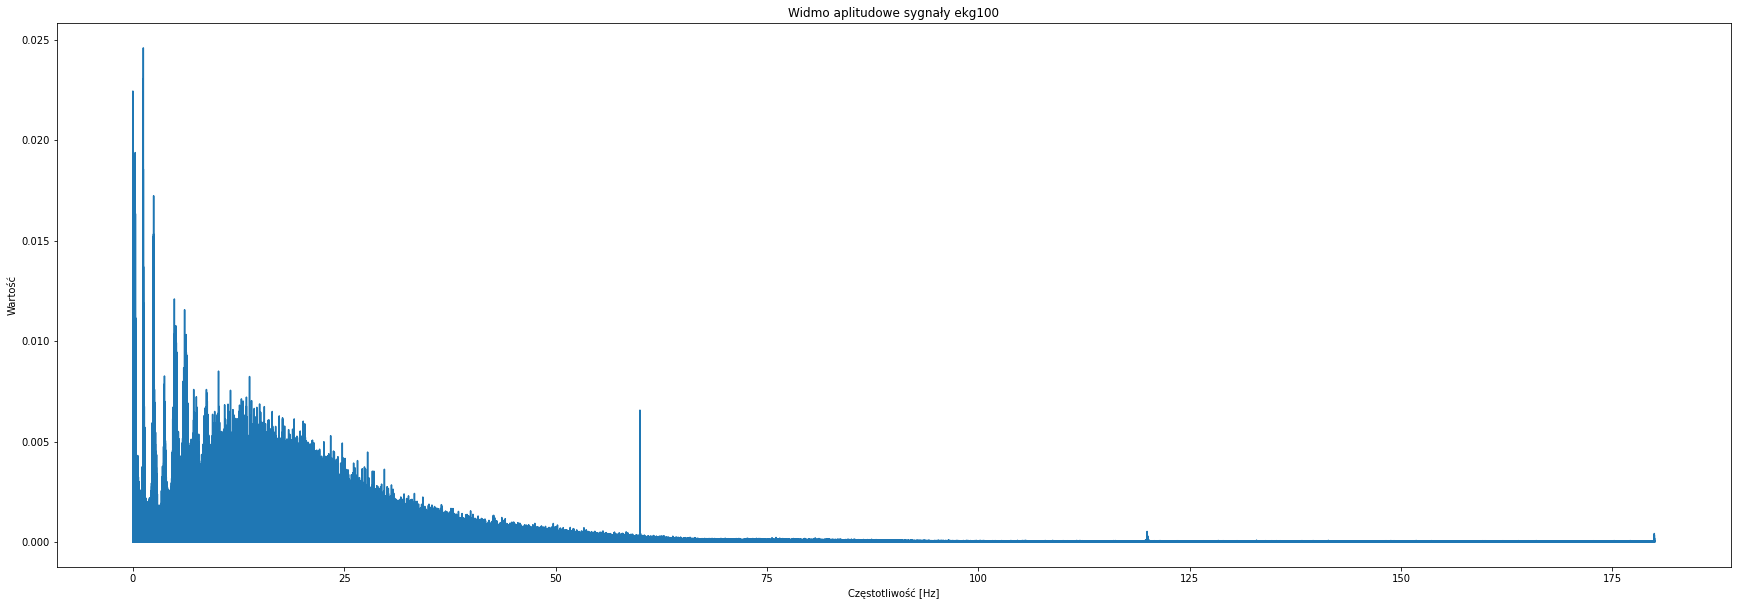

In [17]:
T_s = 1/fs_ekg100 # okres próbkowania
x = np.fft.fftfreq(ekg100.shape[0], T_s) # obliczenie poszczególnych częstotliwości za pomocą dyskretnej transformaty fouriera 
y = np.fft.fft(ekg100['1'])
y_freq = 2*np.abs(y/(ekg100.shape[0]/2))   

positive = x > 0                    # maska, która mówi w którym miejscu x jest większe od 0

plt.figure(figsize = (30, 10))

plt.plot(x[positive], y_freq[positive])
plt.title('Widmo aplitudowe sygnały ekg100')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Wartość')




3. Wyznaczyc odwrotna dyskretna transformate Fouriera ciagu wyznaczonego w
punkcie 2 i porównac otrzymany ciag próbek z pierwotnym sygnałem ecg100
(mozna wyznaczyc róznice sygnałów).

/home/daria/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


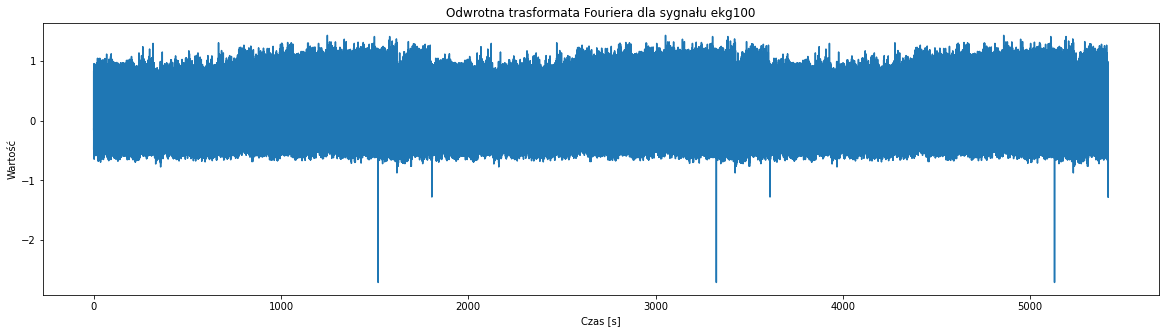

In [18]:
y = np.fft.ifft(y) # wyznaczenie odwrotnej transformaty fouriera


plt.figure(figsize=(20, 5))

plt.subplot(1, 1, 1)

plt.plot(ekg100.index, y)
plt.title('Odwrotna trasformata Fouriera dla sygnału ekg100')
plt.xlabel('Czas [s]')
plt.ylabel('Wartość')

plt.show()

### Zadanie 4 ###

Celem cwiczenia jest praktyczne wypróbowanie działania filtrów
w celu wyeliminowania niepozadanych zakłócen z sygnału EKG. Prosze wybrac
rodzaj filtra do eksperymentowania, np. Butterwortha lub Czebyszewa. Do filtracji
wykorzystac gotowe funkcje z biblioteki scipy.signal [7]. Biblioteka posiada równiez
funkcje wspomagajace projektowanie filtrów, które mozna zastosowac.


In [19]:
ekg_noise = pd.read_csv('ekg_noise.txt', names=['czas', 'A'], sep='\s+', index_col = 0)
fs_ekg_noise = 360 
t_ekg_noise = (ekg_noise.shape[0]-1)/fs_ekg_noise
ekg_noise.head()

,A
czas,
0.000000,-0.325000
0.002778,-0.273038
0.005556,-0.268038
0.008333,-0.320000
0.011111,-0.391962


1. Wczytaj sygnał ekg noise.txt i zauwaz zakłócenia nałozone na sygnał. Wykreslic
czestotliwosciowa charakterystyke amplitudowa sygnału.

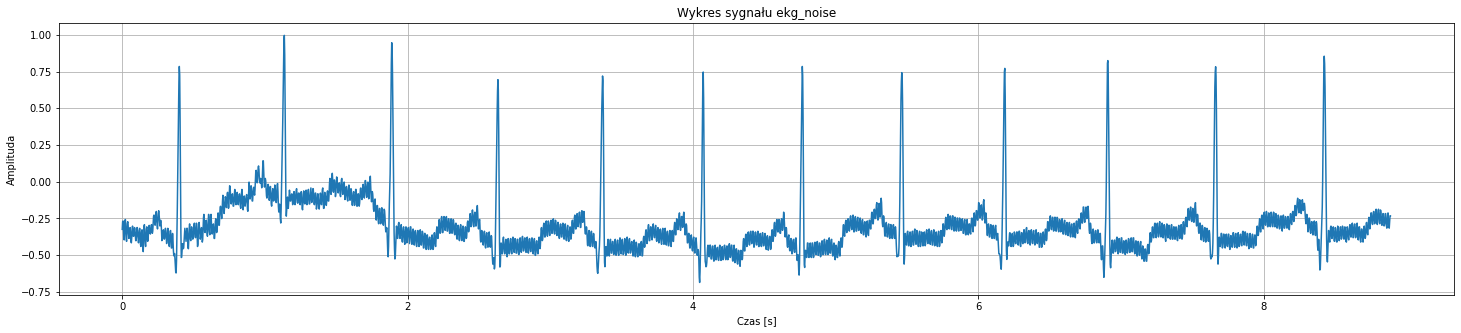

In [20]:
plt.figure(figsize=(25, 5))
plt.plot(ekg_noise.index, ekg_noise['A'])
plt.title('Wykres sygnału ekg_noise')
plt.ylabel('Amplituda')
plt.xlabel('Czas [s]')
plt.grid(axis='both')

plt.show()

2. Zbadaj filtr dolnoprzepustowy o czestotliwosci granicznej 60 Hz w celu redukcji
zakłócen pochodzacych z sieci zasilajacej. Wyznacz parametry filtra, wykresl
jego charakterystyke (zaleznosc tłumienia od czestotliwosci), przebieg sygnału
po filtracji oraz jego widmo. Mozna tez wyznaczyc róznice miedzy sygnałem
przed i po filtracji i widmo tej róznicy.


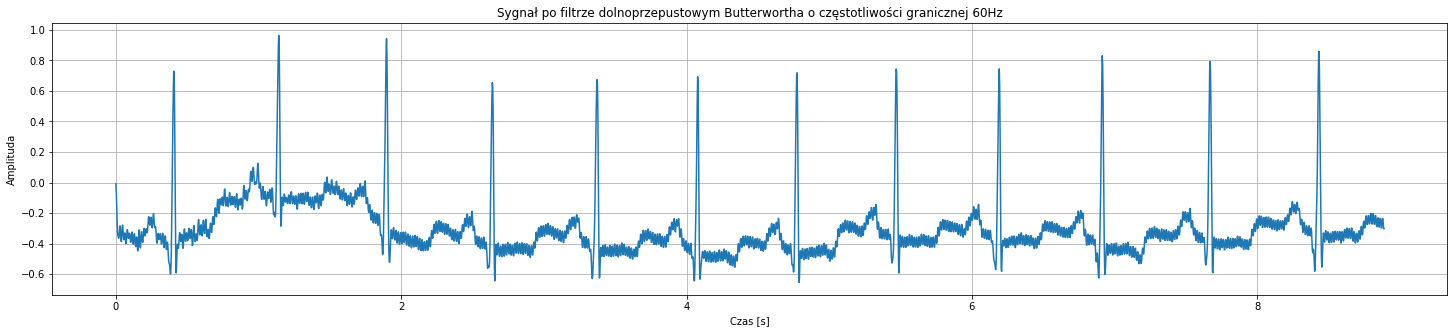

In [21]:
ekg_noise_fd = 60
sos = signal.butter(4, ekg_noise_fd, 'low', fs=360, output='sos') 
filtered_signal = signal.sosfilt(sos, ekg_noise['A']) 

plt.figure(figsize=(25, 5))
plt.plot(ekg_noise.index, filtered_signal)
plt.title('Sygnał po filtrze dolnoprzepustowym Butterwortha o częstotliwości granicznej 60Hz')
plt.ylabel('Amplituda')
plt.xlabel('Czas [s]')
plt.grid(axis='both')

plt.show()

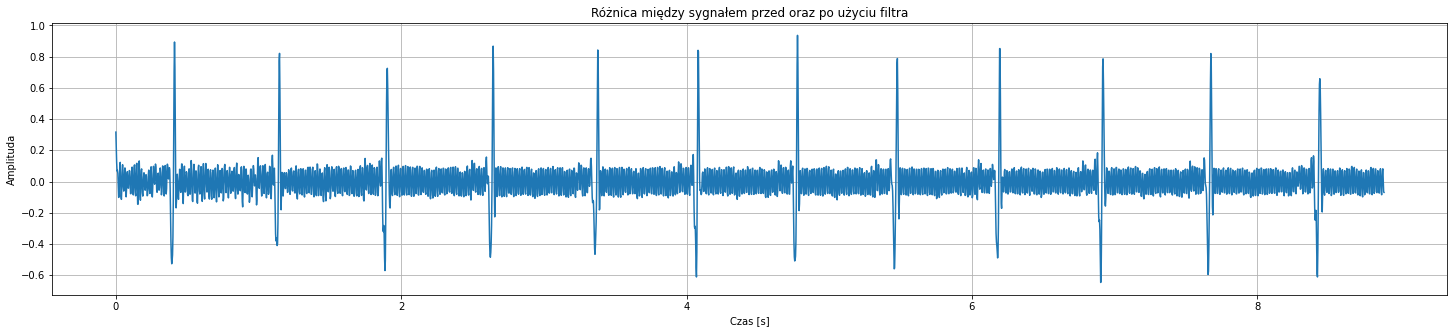

In [22]:
plt.figure(figsize=(25, 5))
plt.plot(ekg_noise.index, filtered_signal - ekg_noise['A'])
plt.title('Różnica między sygnałem przed oraz po użyciu filtra')
plt.ylabel('Amplituda')
plt.xlabel('Czas [s]')
plt.grid(axis='both')

plt.show()